In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import numpy as np
import os
import seaborn as sns

### compare Euler-CPU (full-space search) with Euler-GPU and Euler-Elastix

In [3]:
euler_cpu_path = '/home/alicia/data_personal/registered/euler_grid_search_full-v3'
euler_gpu_v1_path = '/home/alicia/data_personal/registered/euler_grid_search_full-gpu'
euler_gpu_v2_path = 'euler_gpu_gnccs.json'

with open('/home/alicia/data_personal/registered/euler_grid_search_full-v1-pos/elastix_euler_gncc.json', 'r') as f:
    euler_elastix_gnccs = json.load(f)

all_files = os.listdir(euler_cpu_path)
print(f'number of registration problems searched: {len(all_files)}')
euler_cpu_gnccs = []
euler_gpu_v1_gnccs = []
euler_gpu_v2_gnccs = []

with open(f'{euler_gpu_v1_path}/euler_search_gpu_gncc.json', 'r') as jf:
    euler_gpu_v1_gncc_dict = json.load(jf)

with open(euler_gpu_v2_path, 'r') as jf:
    euler_gpu_v2_gncc_dict = json.load(jf)
    
for file in all_files:
    if 'json' not in file:
        grid = np.load(f'{euler_cpu_path}/{file}')
        euler_cpu_gnccs.append(np.nanmax(grid))
#     problem = file.split('.')[0]
#     if problem in euler_gpu_gncc_dict.keys():
#         euler_gpu_gnccs.append(euler_gpu_gncc_dict[problem])
#         euler_cpu_gnccs.append(np.nanmax(grid))

number of registration problems searched: 82


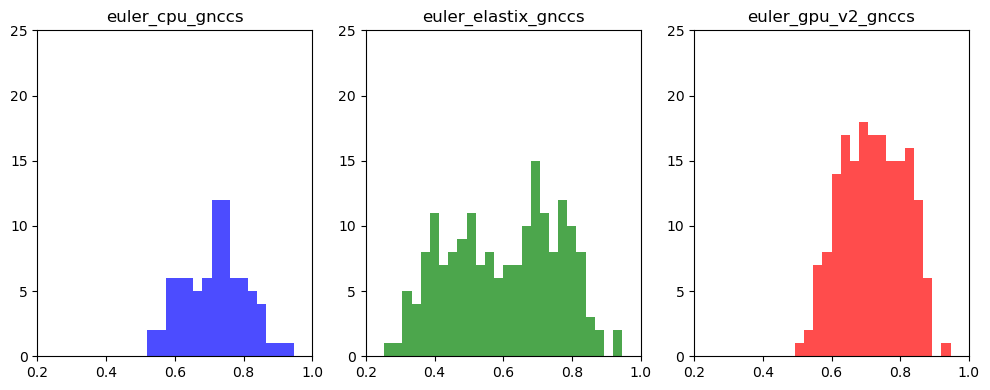

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Plot histograms
bin_edges = np.linspace(0.2, 1, 31)

axes[0].hist(euler_cpu_gnccs, bins=bin_edges, color='blue', alpha=0.7)
axes[0].set_title('euler_cpu_gnccs')
axes[0].set_ylim([0, 25])
axes[0].set_xlim([0.2, 1])

# axes[1].hist(euler_gpu_v1_gncc_dict.values(), bins=bin_edges, color='red', alpha=0.5)
# axes[1].set_title('euler_gpu_v1_gnccs')
# axes[1].set_ylim([0, 25])
# axes[1].set_xlim([0.2, 1])

axes[1].hist(euler_elastix_gnccs.values(), bins=bin_edges, color='green', alpha=0.7)
axes[1].set_title('euler_elastix_gnccs')
axes[1].set_ylim([0, 25])
axes[1].set_xlim([0.2, 1])

axes[2].hist(euler_gpu_v2_gncc_dict.values(), bins=bin_edges, color='red', alpha=0.7)
axes[2].set_title('euler_gpu_vgnccs')
axes[2].set_ylim([0, 25])
axes[2].set_xlim([0.2, 1])

plt.tight_layout() 
plt.show()

In [13]:
euler_cpu_gnccs

[0.6971767826589355,
 0.7488764263573866,
 0.8373111154191487,
 0.7908732836105313,
 0.7495633373745597]

In [14]:
euler_gpu_gnccs

[0.4976837933063507,
 0.4268094301223755,
 0.8337364792823792,
 0.7983179688453674,
 0.6988372206687927]

### compare Euler-CPU (searched only the positive space) with Euler-Elastix

In [8]:
home = '/home/alicia/data_personal/registered/euler_grid_search_full'

with open(f'{home}/euler_search_gncc.json') as f:
    euler_grid_search_gnccs = list(json.load(f).values())

with open(f'{home}/elastix_euler_gncc.json') as f:
    elastix_euler_gnccs = list(json.load(f).values())
    
with open(f'{home}/head_position_distances.json') as f:
    head_position_distances = list(json.load(f).values())

In [9]:
len(elastix_euler_gnccs), len(head_position_distances)

(181, 181)

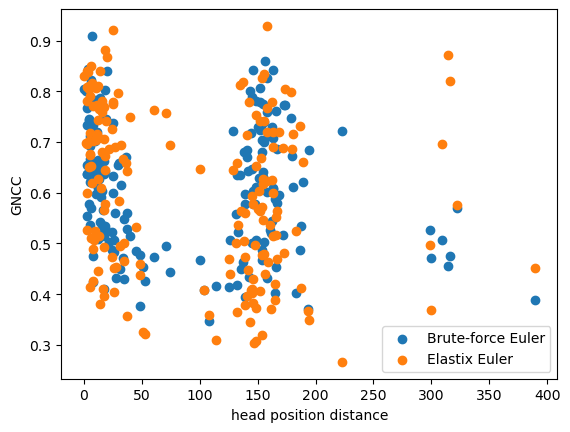

In [10]:
plt.scatter(head_position_distances, euler_grid_search_gnccs, label='Brute-force Euler');
plt.scatter(head_position_distances, elastix_euler_gnccs, label='Elastix Euler');
plt.xlabel('head position distance');
plt.ylabel('GNCC');
plt.legend();

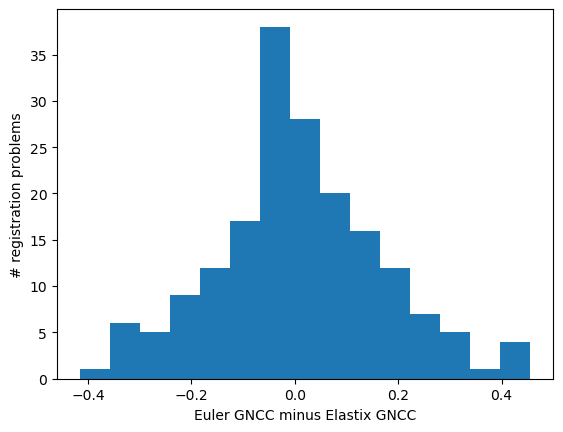

In [11]:
plt.hist(np.array(euler_grid_search_gnccs) - np.array(elastix_euler_gnccs), bins=15);
plt.xlabel('Euler GNCC minus Elastix GNCC');
plt.ylabel('# registration problems');

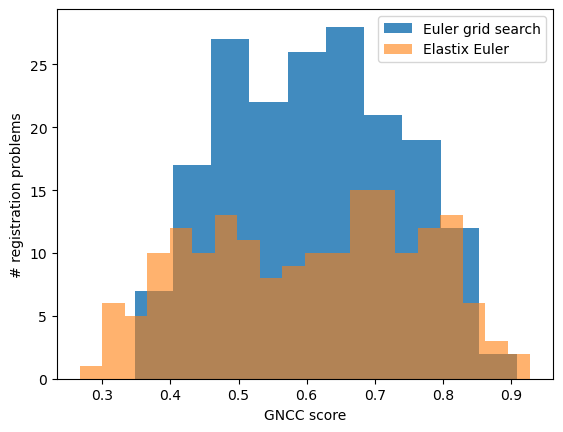

In [12]:
plt.hist(euler_grid_search_gnccs, alpha=0.85, bins=10, label='Euler grid search');
plt.hist(elastix_euler_gnccs, bins=20, alpha=0.6, label='Elastix Euler');
plt.legend();
plt.xlabel('GNCC score');
plt.ylabel('# registration problems');

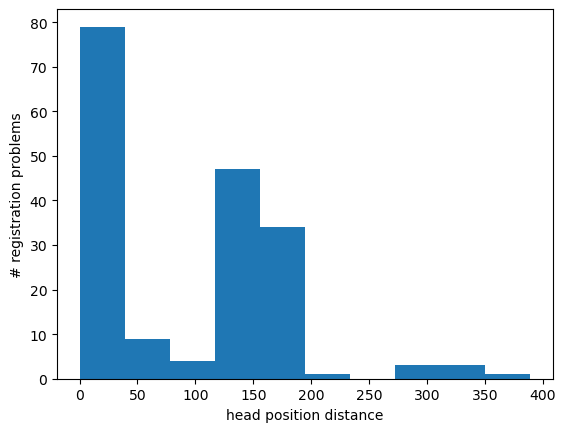

In [13]:
plt.hist(head_position_distances);
plt.xlabel('head position distance');
plt.ylabel('# registration problems');

#### visualize the effective parameter space to search

In [14]:
all_files = [f for f in os.listdir(home) if os.path.isfile(os.path.join(home, f)) and 'json' not in f]

In [15]:
grid1 = np.load(f'{home}/{all_files[0]}')
grid2 = np.load(f'{home}/{all_files[1]}')
np.nanmax(grid1), np.nanmax(grid2)

(0.5346667661227106, 0.6661199225961323)

In [16]:
all_grids = []
for file in tqdm(all_files):
    all_grids.append(np.load(f'{home}/{file}'))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 181/181 [00:10<00:00, 16.77it/s]


In [24]:
binary_grids = [(grid > 0.5).astype(int) for grid in all_grids]
sum_grids = np.sum(np.stack(binary_grids), axis=0)
overlap_grids = (sum_grids > 2).astype(int)

In [25]:
indices = np.argwhere(overlap_grids > 0)
x_values = indices[:, 0]
y_values = indices[:, 1]
theta_values = indices[:, 2]
x_range, y_range, theta_range = (x_values.min(), x_values.max()),\
                                (y_values.min(), y_values.max()),\
                                (theta_values.min(), theta_values.max())

In [26]:
x_range, y_range, theta_range

((0, 13), (0, 26), (0, 354))

In [27]:
np.max(sum_grids[13:, 26:, :])

1

In [28]:
np.max(sum_grids[:13, :26, :])

32

In [29]:
sum_grids.shape

(200, 90, 355)

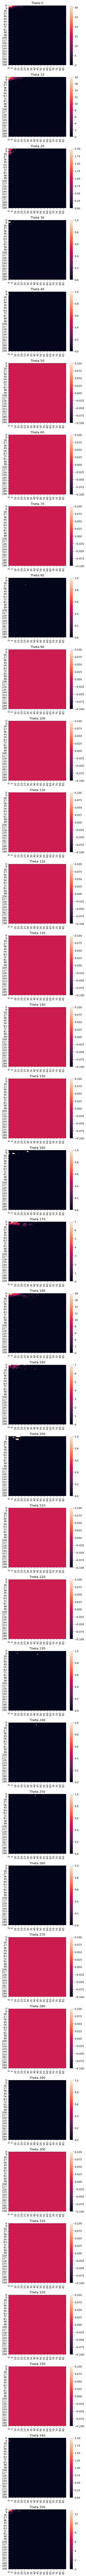

In [30]:
# n_slices = sum_grids.shape[2]
n_slices = len(list(range(0, 355, 10)))
fig, axes = plt.subplots(n_slices, 1, figsize=(5, 5*n_slices))
i = 0
for theta in range(0, 355, 10):
    sns.heatmap(sum_grids[:, :, theta], ax=axes[i])
    axes[i].set_title(f'Theta {theta}')
    i += 1